In [44]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [19]:
def arditi_ginzburg_update(prey, predator, params):
    """
    Arditi-Ginzburg update rule for a pair of two species in a predator-prey relationship.
    Based on:
    https://math.stackexchange.com/questions/613081/how-do-i-adjust-model-parameters-to-get-stable-oscillations-with-arditi-ginzburg

    params = [a, b, c, g, m]
    A,B: controls the growth of the prey w/o predator
    C controls how fast the predator consumes the prey
    G controls how fast the predator dies w/o prey
    M controls how fast the predator grows with maximum prey
    """
    a, b, c, g, m = params
    d_prey = prey * (a - b * prey) - c * prey * predator / (prey + predator)
    d_predator = -g * predator + m * prey * predator / (prey + predator)
    return d_prey, d_predator

In [21]:
food_chain = nx.DiGraph()
food_chain.add_edge("fox", "rabbit")
food_chain.add_edge("rabbit", "carrot")

In [105]:
class Population:
    def __init__(self, food_chain, timestep=0.01, params=None):
        self.food_chain = food_chain.copy()
        self.timestep = timestep
        self.time = 0

        # for each species, set initial population to 1
        for node in self.food_chain.nodes():
            self.food_chain.nodes[node]["population"] = 1

        # initialize each relationship with random parameters
        if params is None:
            self.params = np.random.lognormal(mean=0, sigma=2, size=5)
        else:
            self.params = params
        for edge in self.food_chain.edges():
            self.food_chain[edge[0]][edge[1]]["params"] = self.params
    
    def update(self):
        updates_dict = {}
        for species in self.food_chain.nodes():
            updates_dict[species] = 0
        
        for predator, prey, data in self.food_chain.edges(data=True):
            prey_pop = self.food_chain.nodes[prey]["population"]
            predator_pop = self.food_chain.nodes[predator]["population"]
            d_prey, d_predator = arditi_ginzburg_update(prey_pop, predator_pop, data["params"])
            updates_dict[prey] += d_prey * self.timestep
            updates_dict[predator] += d_predator * self.timestep
        
        for species in self.food_chain.nodes():
            self.food_chain.nodes[species]["population"] += updates_dict[species]

[1.91097013 1.26995212 0.09562054 0.63961868 1.68372565]


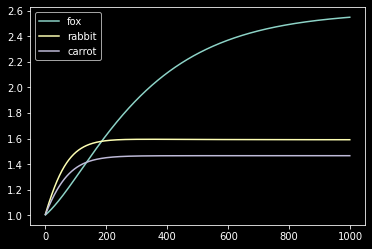

In [102]:
population = Population(food_chain)
print(population.params)
species_populations_in_time = {species: [] for species in food_chain.nodes()}

for i in range(1000):
    population.update()
    for species in population.food_chain.nodes():
        current_pop = population.food_chain.nodes[species]["population"]
        species_populations_in_time[species].append(current_pop)

# plot the population of each species over time
for species in species_populations_in_time:
    plt.plot(species_populations_in_time[species], label=species)
plt.legend()
plt.show()

In [104]:
some_sensible_param_choices = [
    [0.34726426, 0.15137716, 0.09077025, 0.39754857, 1.07399552],
    [2.48569492, 0.13869307, 0.04221369, 1.02404277, 1.46213082],
    [1.91097013, 1.26995212, 0.09562054, 0.63961868, 1.68372565],
]

{'fox': 4.155283335486358, 'rabbit': 2.4467074471095853, 'carrot': 1.9608459467127846}


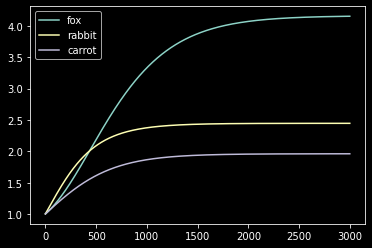

{'fox': 6.840349040922209, 'rabbit': 15.996710483853047, 'carrot': 17.778114814085363}


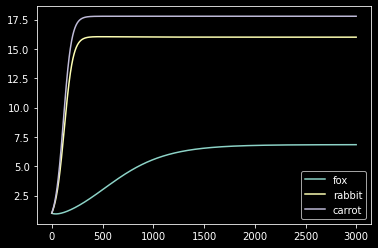

{'fox': 2.595923971775946, 'rabbit': 1.590269306972976, 'carrot': 1.4655741019598143}


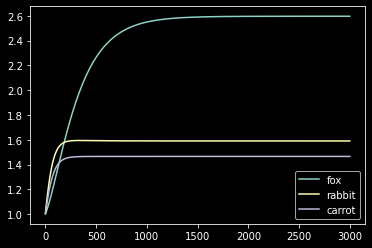

In [110]:
for params in some_sensible_param_choices:
    population = Population(food_chain, params=params)
    species_populations_in_time = {species: [] for species in food_chain.nodes()}

    for i in range(3000):
        population.update()
        for species in population.food_chain.nodes():
            current_pop = population.food_chain.nodes[species]["population"]
            species_populations_in_time[species].append(current_pop)
    
    # print last population of each species
    print({species: population.food_chain.nodes[species]["population"] for species in food_chain.nodes()})

    # plot the population of each species over time
    for species in species_populations_in_time:
        plt.plot(species_populations_in_time[species], label=species)
    plt.legend()
    plt.show()

{'fox': 1.5573521880055115, 'rabbit': 0.917383608528423, 'carrot': 2.1123429418092043}


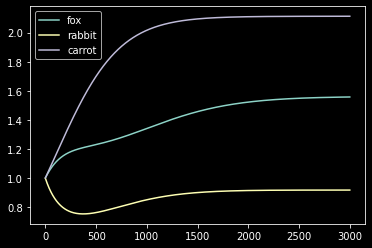

{'fox': 5.529260120986078, 'rabbit': 12.930000980167188, 'carrot': 17.794181485330046}


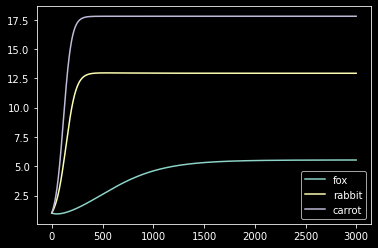

{'fox': 2.0731010488939154, 'rabbit': 1.2699848341630686, 'carrot': 1.4698566951851075}


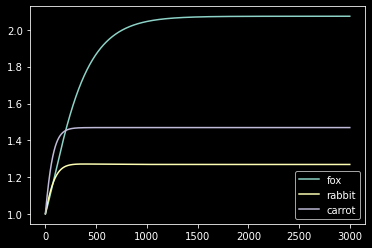

In [114]:

for params in some_sensible_param_choices:
    population = Population(food_chain, params=params)
    species_populations_in_time = {species: [] for species in food_chain.nodes()}

    for i in range(3000):
        population.update()
        
        # hunt foxes
        population.food_chain.nodes["rabbit"]["population"] *= 0.995

        for species in population.food_chain.nodes():
            current_pop = population.food_chain.nodes[species]["population"]
            species_populations_in_time[species].append(current_pop)
    
    # print last population of each species
    print({species: population.food_chain.nodes[species]["population"] for species in food_chain.nodes()})

    # plot the population of each species over time
    for species in species_populations_in_time:
        plt.plot(species_populations_in_time[species], label=species)
    plt.legend()
    plt.show()